# UNIST MGE303 Data Mining
## Lab Session 02 | 2020-04-22 (TUE)
### Seok-Ju Hahn (sjhahn11512@unist.ac.kr)



## Supervised Learning (Classification): Heart Disease Prediction

### Preparation
- Load packages using `import` command and alias command (`as`)
- Remember trio: numpy, pandas, matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Features Description
  - age 
  - sex: 0 = female; 1 = male
  - cp: chest pain type (4 values)
    - 1: typical angina 
    - 2: atypical angina 
    - 3: non-anginal pain 
    - 4: asymptomatic
  - trestbps: resting systolic blood pressure 
  - chol: serum cholesterol in mg/dl 
  - fbs: fasting blood sugar > 120 mg/dl (0, 1)
  - restecg: resting electrocardiographic results
    - 0: normal
    - 1: having ST-T wave abnormality
    - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
  - thalach: maximum heart rate achieved 
  - exang: exercise induced angina (질식감이 따르는 경련성 통증) (0: No, 1: Yes)
  - oldpeak: ST depression induced by exercise relative to rest 
  - slope: the slope of the peak exercise ST segment
    - 0: upsloping 
    - 1: flat 
    - 2: downsloping 
  - ca: number of major vessels (0-3) colored by flouroscopy 

### Data Munging
* <a href='#Load-data'>Load data</a>
* <a href='#Handle-data'>Handle data</a>
* <a href='#Split-training-and-test-data'>Split training and test data</a>

#### Load data
* Load data using `read_csv()` method
  - Pandas package read data as `DataFrame` attribute

In [2]:
df = pd.read_csv('./heart.csv')

* Check the first few rows of data using `head()` method

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


#### Handle data
* Get some parts of data using `iloc[row_index, column_index]` and `loc[row_index_name, column_name]` methods
  - `:` means 'all'
  - Attaching `.values` returns numpy array, if not it reutrns `pd.Series` attribute

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


* Categorical features are indicated as `int64`.
* Let's change this to `object` dtype.
  - It is for normal operation of `hist()` method and `describe()` method.

In [14]:
cat_feat = ['cp', 'fbs', 'sex', 'restecg', 'exang', 'ca', 'slope']

In [15]:
df[cat_feat] = df[cat_feat].astype(object)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    object 
 12  target    303 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 30.9+ KB


* Check a categorical feature using `value_counts()` method

In [17]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [18]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [19]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [20]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [21]:
df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

In [22]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [23]:
df['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [24]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

* Or, you can do these using `for` loop.

In [25]:
for cat in cat_feat:
    print(f'[INFO] Feature {cat}')
    print(df[cat].value_counts())
    print('\n')

[INFO] Feature cp
0    143
2     87
1     50
3     23
Name: cp, dtype: int64


[INFO] Feature fbs
0    258
1     45
Name: fbs, dtype: int64


[INFO] Feature sex
1    207
0     96
Name: sex, dtype: int64


[INFO] Feature restecg
1    152
0    147
2      4
Name: restecg, dtype: int64


[INFO] Feature exang
0    204
1     99
Name: exang, dtype: int64


[INFO] Feature ca
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64


[INFO] Feature slope
2    142
1    140
0     21
Name: slope, dtype: int64




* You SHOULD check the ratio of target variable if it is categorical!

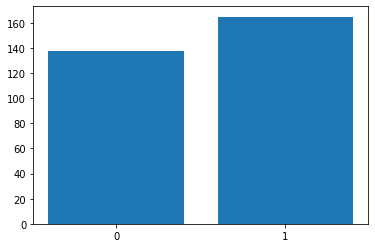

In [26]:
plt.bar(['0', '1'], df['target'].value_counts(ascending=True))
plt.show()

In [27]:
ratio = len(df['target'][df['target'] == 1]) / len(df['target'][df['target'] == 0])
print(f'Ratio between 0 : 1 = 1:{ratio:.4f}')

Ratio between 0 : 1 = 1:1.1957


* Check summarized information of **numerical** features using `describe()` method

In [28]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


* Plot histogram of each column to check sanity of the data
  - Attach `hist()` method to your dataframe

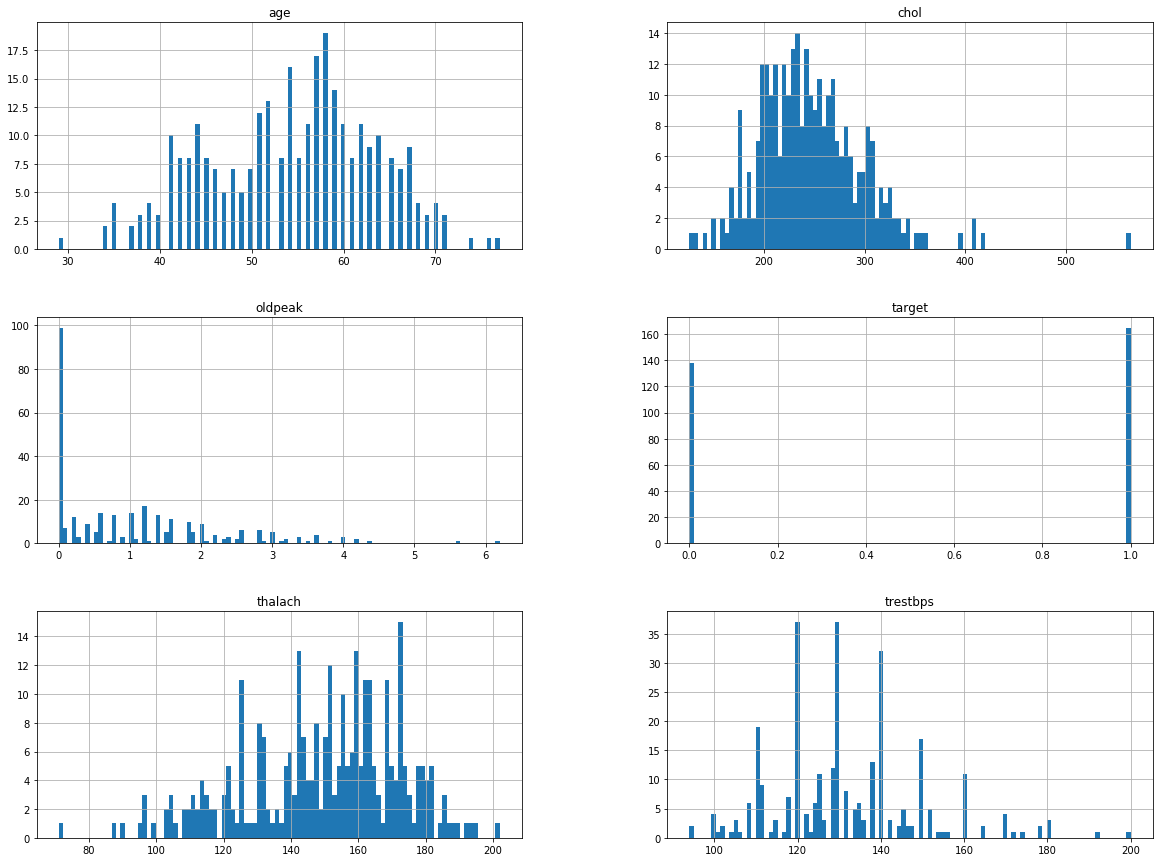

In [29]:
df.hist(bins=100, figsize=(20, 15))
plt.show()

##### What things can you find in the above histograms?
- It seems that 'chol(혈청 콜레스테롤)' variable has some outliers. (see the values over 500) 
  - It is obvious that over 240 mg/dL cholesterol indicates serious status in heart-related disease.
  - So, we are going to remove these samples
- Likewise, rightmost values of 'oldpeak' variable also indicate abnormal patients.
  - So, we are going to remove samples with oldpeaks > 5.
- 'trestbps(수축기 혈압)' variable also has outliers.
  - Usually, people with systolic blood pressure over 180 are in the very serious status of hypertension (고혈압).
  - So, we are going to remove samples with trestbps > 180.
- Scales (value range) of predictors are different from each other.
  - It is to be handled in data pre-processing stage.

In [30]:
df = df[df['chol'] < 500]
df = df[df['oldpeak'] < 5]
df = df[df['trestbps'] < 180]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       295 non-null    int64  
 1   sex       295 non-null    object 
 2   cp        295 non-null    object 
 3   trestbps  295 non-null    int64  
 4   chol      295 non-null    int64  
 5   fbs       295 non-null    object 
 6   restecg   295 non-null    object 
 7   thalach   295 non-null    int64  
 8   exang     295 non-null    object 
 9   oldpeak   295 non-null    float64
 10  slope     295 non-null    object 
 11  ca        295 non-null    object 
 12  target    295 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 32.3+ KB


* As a result, 8 samples are removed.

#### Split training and test data
- Remember, you **MUST** split test data first for simulating unseen data
- Use `train_test_split()` method in scikit-learn package
- If you use test set on training your models, it underestimates generalization error, which induces __data snooping bias__.
- Remember !!!
  - You SHOULD split your training and test set by keeping ratio of **target** categorical variable.
  - This is called *stratified split*, and it can be easily done by passing `stratify` arugment to the `train_test_split()` method.

<center><img src='https://media.makeameme.org/created/stratified-sample.jpg' width=200, height=100></img></center>

In [32]:
# import method
from sklearn.model_selection import train_test_split

In [33]:
# set `random_state` for reproduciblity
training_set, test_set = train_test_split(df, test_size=0.2, random_state=200422, stratify=df[['target']])

- Check sample counts of training and test set using `len()` method

In [34]:
TR_LENGTH = len(training_set)
TE_LENGTH = len(test_set)

print(f'Training samples: {TR_LENGTH}, Test samples: {TE_LENGTH}')

Training samples: 236, Test samples: 59


In [35]:
training_set['target'].value_counts()

1    130
0    106
Name: target, dtype: int64

In [36]:
ratio = len(training_set['target'][training_set['target'] == 1]) / len(training_set['target'][training_set['target'] == 0])
print(f'Ratio of target in training set 0 : 1 = 1:{ratio:.4f}')

Ratio of target in training set 0 : 1 = 1:1.2264


In [37]:
test_set['target'].value_counts()

1    33
0    26
Name: target, dtype: int64

In [38]:
ratio = len(test_set['target'][test_set['target'] == 1]) / len(test_set['target'][test_set['target'] == 0])
print(f'Ratio of target in training set 0 : 1 = 1:{ratio:.4f}')

Ratio of target in training set 0 : 1 = 1:1.2692


### Exploratory Data Analysis (EDA)

In [39]:
# copy data for preventing damage in raw training data
data = training_set.copy()

* There are many categorical variables
  - Let us see their relationship with target variables using multiple bar chart.
  - It can be easily done by combining `plot()` function of matplotlib package and `crosstab()` function of pandas package.

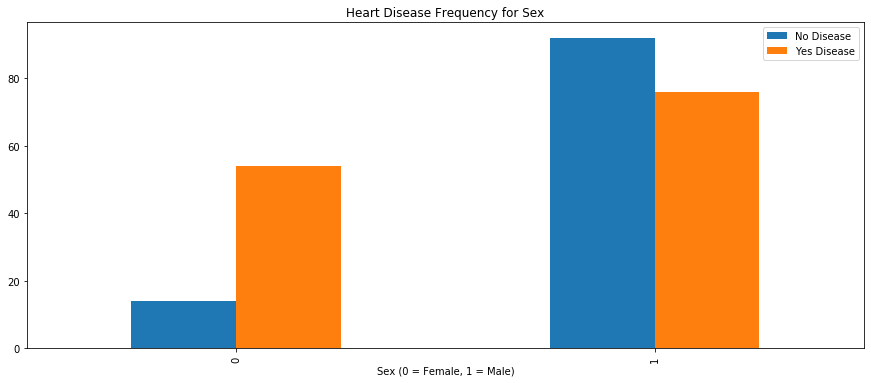

In [40]:
pd.crosstab(data['sex'], data['target']).plot(kind='bar', figsize=(15, 6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(['No Disease', 'Yes Disease'])
plt.show()

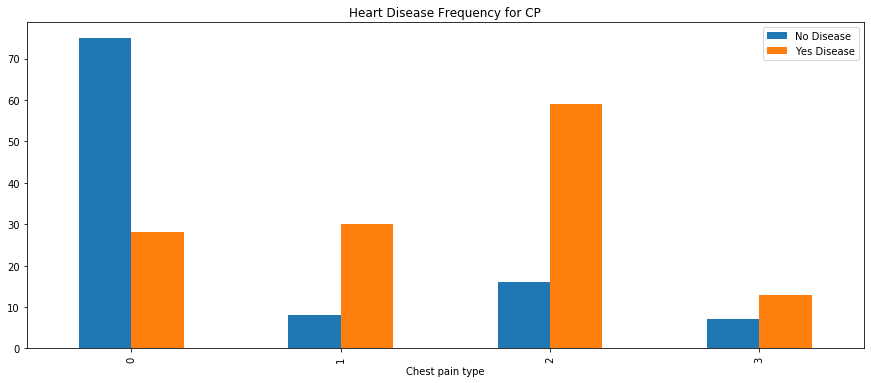

In [41]:
pd.crosstab(data['cp'], data['target']).plot(kind='bar', figsize=(15, 6))
plt.title('Heart Disease Frequency for CP')
plt.xlabel('Chest pain type')
plt.legend(['No Disease', 'Yes Disease'])
plt.show()

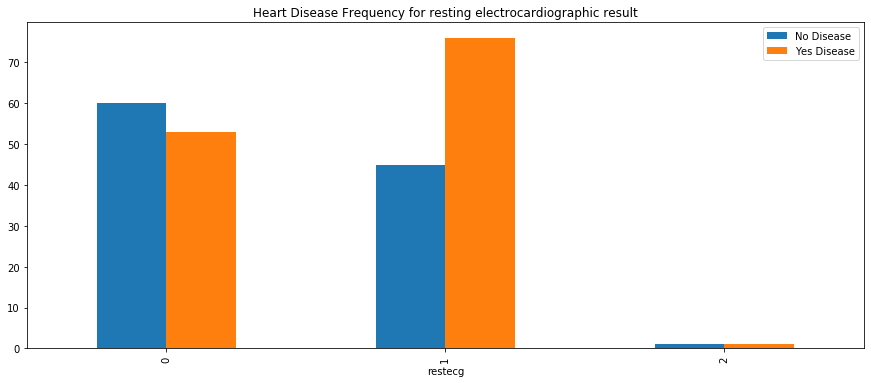

In [43]:
pd.crosstab(data['restecg'], data['target']).plot(kind='bar', figsize=(15, 6))
plt.title('Heart Disease Frequency for resting electrocardiographic result')
plt.xlabel('restecg')
plt.legend(['No Disease', 'Yes Disease'])
plt.show()

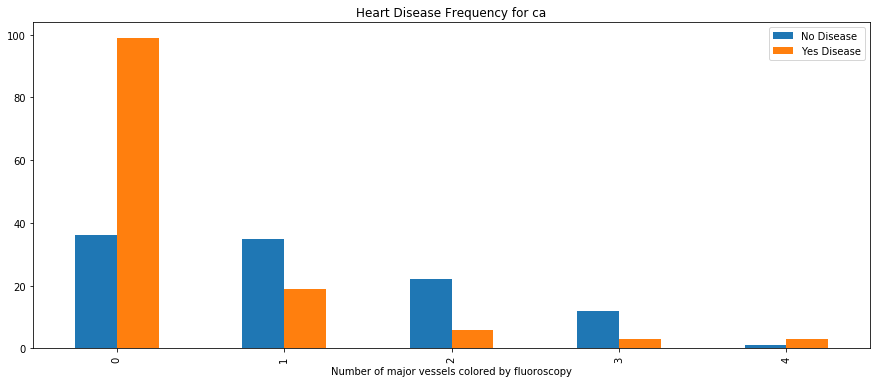

In [44]:
pd.crosstab(data['ca'], data['target']).plot(kind='bar', figsize=(15, 6))
plt.title('Heart Disease Frequency for ca')
plt.xlabel('Number of major vessels colored by fluoroscopy')
plt.legend(['No Disease', 'Yes Disease'])
plt.show()

* You can also check relationship between two numeric variables along with target label
- Use `scatter()` function in matplotlib package

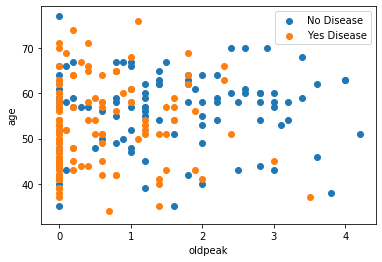

In [45]:
plt.scatter(data['oldpeak'][data['target']==0], data['age'][data['target']==0])
plt.scatter(data['oldpeak'][data['target']==1], data['age'][data['target']==1])
plt.legend(['No Disease', 'Yes Disease'])
plt.xlabel('oldpeak')
plt.ylabel('age')
plt.show()

* You can do more!
  - <u>Create new features</u> by combining existing predictors
  - This kind of work can strengthen our hypothesis (if it is done in a sophisticated manner) 

### Data Pre-processing
* <a href='#Cleanse-data'>Cleanse data</a>
* <a href='#Scale-data'>Scale data</a>

#### Cleanse data
* Handle missing values
  - Just remove rows with missing values
  - Impute missing values using mean, median, or imputation algorithms (NOT covered today)
  - Collect data again
* Drop unncessary columns
* Remove duplicated samples
* Convert categorical data into numerical representation (encoding)

##### Handle missing values
- Remove rows with missing value
- Attach `dropna()` to the dataframe

In [46]:
# We have missing data in 'total_bedrooms' and 'bedrooms_per_room' features
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 234 to 210
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       236 non-null    int64  
 1   sex       236 non-null    object 
 2   cp        236 non-null    object 
 3   trestbps  236 non-null    int64  
 4   chol      236 non-null    int64  
 5   fbs       236 non-null    object 
 6   restecg   236 non-null    object 
 7   thalach   236 non-null    int64  
 8   exang     236 non-null    object 
 9   oldpeak   236 non-null    float64
 10  slope     236 non-null    object 
 11  ca        236 non-null    object 
 12  target    236 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 25.8+ KB


* -> Fortunately, there's no columns with missing values

##### Drop unncessary columns
- As we made new features ('rooms_per_household', 'bedrooms_per_room', 'people_per_household'), let us remove features used for making three predictors
- Attach `drop(columns=['COLUMN_NAME'], axis=1)` to the dataframe

* -> We will use whole columns

##### Drop duplicated samples
- Attach `drop_duplicates()` to the dataframe

* -> Fortunately, there's no rows with duplicated values

- *Beware* that we at first need to split out the dependent variable first!

In [47]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
234,70,1,0,130,322,0,0,109,0,2.4,1,3,0
173,58,1,2,132,224,0,0,173,0,3.2,2,2,0
136,60,0,2,120,178,1,1,96,0,0.0,2,0,1
274,47,1,0,110,275,0,0,118,1,1.0,1,1,0
137,62,1,1,128,208,1,0,140,0,0.0,2,0,1


In [48]:
# let us first separate numerical and categorical(nominal/ordinal) columns
nom_feat = ['fbs', 'sex', 'exang', 'slope']
ord_feat = ['cp', 'restecg', 'ca']
num_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [49]:
X_train, y_train = data.drop(columns=['target'], axis=1, inplace=False), data['target'].values

##### Encode cateogrical feature
- Convert categorical feature represented in string format into numerical representation.
- Use `OneHotEncoder` for nominal features, and `OrdinalEncoder` for ordinal features.

In [50]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [51]:
ohe = OneHotEncoder(sparse=False)
oe = OrdinalEncoder()

ohe.fit(X_train[nom_feat].values)
oe.fit(X_train[ord_feat].values)

X_train_nom = ohe.transform(X_train[nom_feat].values)
X_train_ord = oe.transform(X_train[ord_feat].values)

In [52]:
X_train_nom.shape, X_train_ord.shape

((236, 9), (236, 3))

### Now, all data are transformed into numerical values!

#### Scale data
* Feature scaling means to transform ranges of all **numerical** features to be similar with each other. <br> (it is enough to just one-hot-encode categorical features)
* Standard scaling (standardization) is to make feature to have mean 0 and standard deviation 1.
  - It is **TOTALLY different** from converting data distribution to Gaussian ditsribution!!!
  - Except for models having assumption of Gaussian distributed data, such as Linear Discriminant analysis, Gaussian Mixture models, <br>
  it is NOT needed to convert data distribution to be Gaussian.
  - It is just shift the range of feature distribution
* Feature scaling is especially important for algorithms:
  - based on Euclidean distance like K-means clustering, k-NN (different scale distorts distance measure)
  - based on gradient-based optimizations like logistic regression, neural networks (different scales distorts loss surface)
  - regard scale of features with significance like PCA

##### Scale numerical features
- Scale numerical features to have mean 0 and standard deviation 1
- Use `StandardScaler` provided by Scikit-Learn package
- Select numerical feature columns and call `fit_trnasform()` method

In [53]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(X_train[num_feat].values)
X_train_num = scalar.transform(X_train[num_feat].values)

In [54]:
X_train_num.shape

(236, 5)

##### Finish up data pre-processing
- Now, we need to concatenate categorical (one-hot encoded) and numerical (standardized) features!
- It can be easily done by `np.concatenate([*arrays], axis=1)` method

In [55]:
X_train = np.concatenate([X_train_num, X_train_ord, X_train_nom], axis=1)
X_train.shape

(236, 17)

### Don't forget! You should do the same process above on the test set you made in <a href='#Split-training-and-test-data'>here</a>

#### (Advanced) Automation - <a href='#Pipeline'>Pipeline</a>
- This process can be also automated by using `Pipeline` and `ColumnTransformer` method 
- Automation of such a process is important since data mining process requires fast prototyping and experiments

### Model training and evaluation
* <a href='#Train-model'>Train model</a>
* <a href='#Evaluate-model'>Evaluate model</a>

#### Train model
* Choose an appropriate algorithm for your problem setting
* There are tons of ready-made algorithms in here: <a href='https://scikit-learn.org/stable/supervised_learning.html'>Scikit-Learn</a>

* To train model, we need to create model instance such as `LogisticRegression()` and call `fit()` method by providing independent and dependent variables.

In [56]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

* Performance of the trained model on the training set can easily be found by calling `score()` method. (which returns accuracy)

In [57]:
log_reg.score(X_train, y_train)

0.8432203389830508

* You should evaluate your model with proper metrics
  - If you have highly imbalanced dataset; 
  - e.g. 99 'No' label and 1 'Yes' label, then your accuarcy is still 99% when if your classifier can only return 'No'. 
    - It is called an **imbalanced classification**.
  - In this case, accuracy is not a good choice.
  - What you can do one of these:
    - 1) Find a cut-off value that can maximize (true positive rate - false positive rate) or F1 or other metrics suitable for your problem.
    - 2) Use a metric that is insensitive to the cut-off value, for example ROC-AUC, PRC-AUC.
    - 3) Give a misclassification penalty to your classifier. (can be easily done by using `class_weight` argument of most `sklearn` models)
      - This is called 'cost-sensitive' approach.
      - If you have interest, go find `costcla` Python package!
    - 4) Oversampling / undersampling your data to make a balance between labels
      - Popular and well-known methods: SMOTE, Borderline-SMOTE, ADASYN, TOMEK-Links, etc.
      - NOT recommended in high-dimensional data. (# features > 10~)
      - This make decision boundary behave ambiguously. (underestimate generalization error)
      - You can use deep generative models like GAN, VAE if you have many data. 
  - In default, the classification cut-off value is set to 0.5.
  
<img src='https://miro.medium.com/max/1100/1*Bwhr9ots47akHbrgssKXrA.jpeg' width=500, height=400></img>
<img src='https://t1.daumcdn.net/cfile/tistory/246DD546590C1F0D01'></img>

In [58]:
log_reg_cw = LogisticRegression(class_weight='balanced')
#for class_weight, it also can be {0:0, 1:100}
log_reg_cw.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
log_reg_cw.score(X_train, y_train)

0.8559322033898306

* Vanilla Logistic Regression

In [60]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, precision_recall_fscore_support,\
roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

y_pred_train = log_reg.predict(X_train)
y_proba_train = log_reg.predict_proba(X_train)[:, 1]

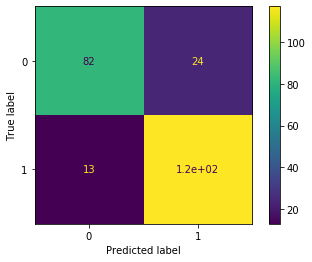

In [61]:
plot_confusion_matrix(log_reg, X_train, y_train)
plt.show()

In [62]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.86      0.77      0.82       106
           1       0.83      0.90      0.86       130

    accuracy                           0.84       236
   macro avg       0.85      0.84      0.84       236
weighted avg       0.84      0.84      0.84       236



In [63]:
print(precision_recall_fscore_support(y_train, y_pred_train, average='binary'))

(0.8297872340425532, 0.9, 0.8634686346863468, None)


In [65]:
print(roc_auc_score(y_train, y_proba_train))
#caucious about using y_proba instead of y_pred

0.9125544267053701


* Class-weighted Logistic Regression

In [66]:
y_pred_train_cw = log_reg_cw.predict(X_train)
y_proba_train_cw = log_reg_cw.predict_proba(X_train)[:, 1]

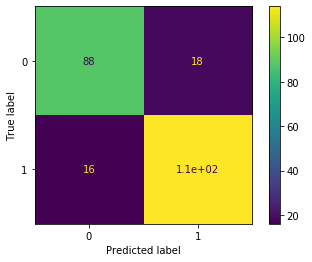

In [67]:
plot_confusion_matrix(log_reg_cw, X_train, y_train)
plt.show()

In [68]:
print(classification_report(y_train, y_pred_train_cw))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       106
           1       0.86      0.88      0.87       130

    accuracy                           0.86       236
   macro avg       0.85      0.85      0.85       236
weighted avg       0.86      0.86      0.86       236



In [69]:
print(precision_recall_fscore_support(y_train, y_pred_train_cw, average='binary'))

(0.8636363636363636, 0.8769230769230769, 0.8702290076335878, None)


In [70]:
print(roc_auc_score(y_train, y_proba_train_cw))

0.9130624092888244


#### Evaluate model
* Internal evaluation
  - Evaluate the performance of the trained model using training data by simulating training-test split internally.
  - Bootstrapping (NOT covered), cross-validation
* External evaluation
  - Evaluate the performance of the trained model using unseen data (test set).

##### Internal evaluation
- Can be easily done by `cross_val_score()` method
- When passing argument `cv=10`, it executes 10-fold CV

In [71]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(), X_train, y_train, scoring='roc_auc', cv=10)
scores

array([1.        , 0.82517483, 0.87412587, 0.93706294, 0.72727273,
       0.81118881, 0.93076923, 0.90769231, 0.81538462, 0.95384615])

In [72]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [73]:
print(f'Scores: {scores},\nMean: {np.mean(scores):.4f},\nStd: {np.std(scores):.4f}')

Scores: [1.         0.82517483 0.87412587 0.93706294 0.72727273 0.81118881
 0.93076923 0.90769231 0.81538462 0.95384615],
Mean: 0.8783,
Std: 0.0785


##### External evaluation
- After processing <a href='#Split-training-and-test-data'>test set</a> you split above in the same way as training set, measure the performance of the trained model on this test set
- Use `predict()` method

In [74]:
test = test_set.copy()

In [75]:
nom_feat = ['fbs', 'sex', 'exang', 'slope']
ord_feat = ['cp', 'restecg', 'ca']
num_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [76]:
X_test, y_test = test.drop(columns=['target'], axis=1, inplace=False), test['target'].values

In [77]:
# ohe, oe are the one you've already done fitting with training set!!!
X_test_nom = ohe.transform(X_test[nom_feat].values)
X_test_ord = oe.transform(X_test[ord_feat].values)

In [78]:
# scalar is the one you've already done fitting with training set!!!
X_test_num = scalar.fit_transform(X_test[num_feat].values)

In [79]:
X_test = np.concatenate([X_test_num, X_test_ord, X_test_nom], axis=1)

In [80]:
y_pred_test = log_reg.predict(X_test)
y_proba_test = log_reg.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred_test)
prc = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
fs = f1_score(y_test, y_pred_test)
aucs = roc_auc_score(y_test, y_proba_test)

print(f'Accuracy: {acc:.4f}, Precision: {prc:.4f}, Recall: {rec:.4f}, F1: {fs:.4f}, AUC: {aucs:.4f}')

Accuracy: 0.8644, Precision: 0.9032, Recall: 0.8485, F1: 0.8750, AUC: 0.9289


In [81]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_proba_test)
rocauc = auc(fpr, tpr)

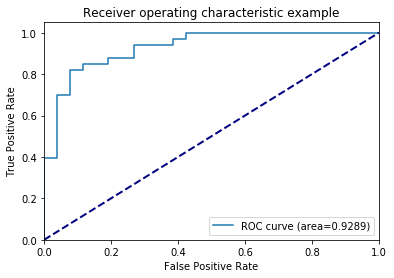

In [82]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area={rocauc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

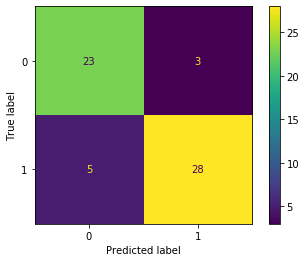

In [83]:
plot_confusion_matrix(log_reg, X_test, y_test)
plt.show()

* Report example

<img src='https://www.researchgate.net/profile/Faisal_Shah3/publication/311256239/figure/fig3/AS:721529801289730@1549037518868/Comparison-of-classifier-performance.png' width=500, height=500></img>
<img src='https://user-images.githubusercontent.com/14326464/65145108-0554ec80-da19-11e9-9415-d6de12997be0.png' width=500, height=500></img>

#### (Advanced) Automation
- Full process can be done by automation

#### Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

# for numerical features
num_pipeline = Pipeline([('standardization', StandardScaler())])

# for nominal features
nom_pipeline = Pipeline([('one_hot_encoding', OneHotEncoder(sparse=False))])

# for ordinal features
ord_pipeline = Pipeline([('ordinal_encoding', OrdinalEncoder())])

In [ ]:
from sklearn.compose import ColumnTransformer

nom_feat = ['fbs', 'sex', 'exang', 'slope']
ord_feat = ['cp', 'restecg', 'ca']
num_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

pipelines = ColumnTransformer([('numeric_features', num_pipeline, num_feat), ('nominal_feature', nom_pipeline, nom_feat), ('ordinal_feature', ord_pipeline, ord_feat)])

#### Full Automation

In [ ]:
X_train, y_train = training_set.drop(columns=['target'], axis=1, inplace=False), training_set['target'].values
X_test, y_test = test_set.drop(columns=['target'], axis=1, inplace=False), test_set['target'].values

In [ ]:
full_pipeline = Pipeline([('pre_processing', pipelines), ('logistic_regression', LogisticRegression())])

full_pipeline.fit(X_train, y_train)
cv_score = cross_val_score(full_pipeline, X_train, y_train, cv=10, scoring='f1')

test_prediction = full_pipeline.predict(X_test)
test_probability = full_pipeline.predict_proba(X_test)[:, 1]

In [ ]:
cv_score

In [ ]:
acc = accuracy_score(y_test, test_prediction)
prc = precision_score(y_test, test_prediction)
rec = recall_score(y_test, test_prediction)
fs = f1_score(y_test, test_prediction)
aucs = roc_auc_score(y_test, test_probability)

print(f'Accuracy: {acc:.4f}, Precision: {prc:.4f}, Recall: {rec:.4f}, F1: {fs:.4f}, AUC: {aucs:.4f}')